# Edgar Adrian López González
## 000141236

El objetivo del examen final es construir un portafolio riesgoso con 7 acciones e invertir en un portafolio completo que maximice tu utilidad.  Considera una tasa libre de riesgo de 5.0%, un premio por riesgo de mercado de 10.0% y un nivel de aversión al riesgo A=3

In [ ]:
#Seleccionar archivo donde se encuentran los activos financieros para hacer el ejercicio
from google.colab import files
import pandas as pd
import random
uploaded = files.upload()

Saving ipc.xlsx to ipc (3).xlsx


In [ ]:
#Escribir el nombre del archivo que se subio
import io
df = pd.read_excel(io.BytesIO(uploaded['ipc.xlsx']))

Para las 7 acciones seleccionadas, calcula:  
## Rendimiento esperado diario y anual bajo los siguientes modelos:  


### Modelo de rendimiento promedio constante  

In [ ]:
df.set_index('DATE', inplace= True)

In [ ]:
random.seed(200)
sample = df.sample(7, axis = 1)

In [ ]:
rend = sample.pct_change(1).dropna()

In [ ]:
print("Los rendimientos esperados diarios de las siguientes acciones son: ")
rend.mean()

Los rendimientos esperados diarios de las siguientes acciones son: 


AC* MF Equity         0.000062
FEMSAUBD MF Equity    0.000185
RA MF Equity          0.000321
BIMBOA MF Equity     -0.000132
TLEVICPO MF Equity   -0.000547
WALMEX* MF Equity     0.000327
AMXL MF Equity        0.000348
dtype: float64

In [ ]:
print("Los rendimientos esperados anuales de las siguientes acciones son: ")
rend.mean()*252

Los rendimientos esperados anuales de las siguientes acciones son: 


AC* MF Equity         0.015670
FEMSAUBD MF Equity    0.046561
RA MF Equity          0.081001
BIMBOA MF Equity     -0.033289
TLEVICPO MF Equity   -0.137916
WALMEX* MF Equity     0.082426
AMXL MF Equity        0.087740
dtype: float64

###  Modelo CAPM 


Utilizando la formula

$\beta_i = \frac{\text{Cov}(r_i, r_m)}{\text{Var}(r_m)}$

In [ ]:
rend['Market'] = df[['MEXBOL INDEX']].pct_change(1).dropna()

In [ ]:
matriz = rend.cov()/rend['Market'].var()

Las betas de cada uno de los activos financieros son:

In [ ]:
betas = matriz['Market'][0:7]
print(betas)

AC* MF Equity         0.612179
FEMSAUBD MF Equity    0.791768
RA MF Equity          0.746196
BIMBOA MF Equity      0.917521
TLEVICPO MF Equity    0.876959
WALMEX* MF Equity     0.885452
AMXL MF Equity        1.143297
Name: Market, dtype: float64


La clasificación de las betas es:

In [ ]:
betas.apply(lambda x: "Acción agresiva" if x > 1 else "Acción pasiva")

AC* MF Equity           Acción pasiva
FEMSAUBD MF Equity      Acción pasiva
RA MF Equity            Acción pasiva
BIMBOA MF Equity        Acción pasiva
TLEVICPO MF Equity      Acción pasiva
WALMEX* MF Equity       Acción pasiva
AMXL MF Equity        Acción agresiva
Name: Market, dtype: object

## Matriz de Varianza-Covarianza




La matriz de varianza y convarianza de rendimientos diarios es:

In [ ]:
rend.cov()

,AC* MF Equity,FEMSAUBD MF Equity,RA MF Equity,BIMBOA MF Equity,TLEVICPO MF Equity,WALMEX* MF Equity,AMXL MF Equity,Market
AC* MF Equity,0.000159,0.000036,0.000034,0.000068,0.000027,0.000034,0.000040,0.000043
FEMSAUBD MF Equity,0.000036,0.000128,0.000042,0.000047,0.000039,0.000042,0.000051,0.000056
RA MF Equity,0.000034,0.000042,0.000239,0.000058,0.000030,0.000037,0.000039,0.000053
BIMBOA MF Equity,0.000068,0.000047,0.000058,0.000237,0.000057,0.000049,0.000061,0.000065
TLEVICPO MF Equity,0.000027,0.000039,0.000030,0.000057,0.000313,0.000019,0.000075,0.000062
WALMEX* MF Equity,0.000034,0.000042,0.000037,0.000049,0.000019,0.000215,0.000045,0.000063
AMXL MF Equity,0.000040,0.000051,0.000039,0.000061,0.000075,0.000045,0.000229,0.000081
Market,0.000043,0.000056,0.000053,0.000065,0.000062,0.000063,0.000081,0.000071


La matriz de varianza y covarianza de rendimientos anuales es:

In [ ]:
rend.cov()*252

,AC* MF Equity,FEMSAUBD MF Equity,RA MF Equity,BIMBOA MF Equity,TLEVICPO MF Equity,WALMEX* MF Equity,AMXL MF Equity,Market
AC* MF Equity,0.039994,0.009032,0.008445,0.017120,0.006719,0.008629,0.009976,0.010913
FEMSAUBD MF Equity,0.009032,0.032347,0.010502,0.011953,0.009863,0.010560,0.012935,0.014115
RA MF Equity,0.008445,0.010502,0.060234,0.014623,0.007613,0.009333,0.009736,0.013303
BIMBOA MF Equity,0.017120,0.011953,0.014623,0.059816,0.014381,0.012253,0.015397,0.016357
TLEVICPO MF Equity,0.006719,0.009863,0.007613,0.014381,0.078753,0.004830,0.018967,0.015634
WALMEX* MF Equity,0.008629,0.010560,0.009333,0.012253,0.004830,0.054222,0.011409,0.015785
AMXL MF Equity,0.009976,0.012935,0.009736,0.015397,0.018967,0.011409,0.057781,0.020382
Market,0.010913,0.014115,0.013303,0.016357,0.015634,0.015785,0.020382,0.017827


## Utilizando los rendimientos esperados bajo el modelo CAPM, construye: 

In [ ]:
from scipy.optimize import minimize 
import numpy as np
import matplotlib.pyplot as plt 
rf = 5/100
premio_riesgo = 10/100
r_capm = rf + betas*premio_riesgo
#Rendimientos esperados bajo CAPM
r_capm

AC* MF Equity         0.111218
FEMSAUBD MF Equity    0.129177
RA MF Equity          0.124620
BIMBOA MF Equity      0.141752
TLEVICPO MF Equity    0.137696
WALMEX* MF Equity     0.138545
AMXL MF Equity        0.164330
Name: Market, dtype: float64

### Frontera de carteras de mínima varianza y frontera eficiente / graficar 

#### Con ventas en corto

In [ ]:
matriz_cov = rend.drop('Market',axis = 1).cov()

In [ ]:
#Obteniendo rendimientos esperados de -200% hasta 200%
sim_ren = np.linspace(start=-2, stop = 2,num = 500)

In [ ]:
pesos_optimos = []
rend_opt = []
vol_opt = []
for i in sim_ren:
    constraints = [
        {"type": "eq", "fun": lambda x: x.sum()- 1 },
        {"type": "eq", "fun": lambda w: w.dot(r_capm) - i}
    ]

    port1 = minimize(lambda w: w.dot(matriz_cov).dot(w),np.random.random(7), constraints=constraints)
    w_opt = port1.x
    rend_opt.append( w_opt.dot(r_capm))
    vol_opt.append(w_opt.dot(matriz_cov).dot(w_opt))
    pesos_optimos.append(w_opt)

Dibujando la frontera de minima varianza dado los rendimientos buscando mostrados anteriormente

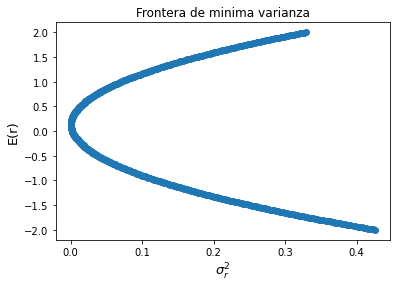

In [ ]:
plt.scatter(vol_opt, rend_opt)
plt.title("Frontera de minima varianza")
plt.xlabel(r"$\sigma^2_r$", fontsize=13)
plt.ylabel("E(r)", fontsize=13);
plt.show((25,10))

Ahora bien, busquemos el portafolio global de minima varianza

In [ ]:
constraints = [
    {"type": "eq", "fun": lambda x: x.sum()- 1 },

]

port1 = minimize(lambda w: w.dot(matriz_cov).dot(w),np.random.random(7), constraints=constraints)
w_opt = port1.x
rend_glob_opt = w_opt.dot(r_capm)
vol_glob_opt = w_opt.dot(matriz_cov).dot(w_opt)


Los pesos del portafolio global de minima varianza son:

In [ ]:
w_opt

array([ 0.00770564,  0.10670742, -0.33206163,  0.37138397, -0.03865502,
        0.50275889,  0.38216074])

Por lo que la frontera eficiente esta determinado por los siguientes portafolios

In [ ]:
rend_eficiente = np.array(rend_opt)[rend_opt> rend_glob_opt]
vol_eficiente = np.array(vol_opt)[rend_opt> rend_glob_opt]

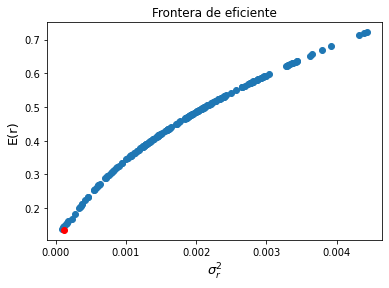

In [ ]:
plt.scatter(vol_eficiente, rend_eficiente)
plt.scatter(vol_glob_opt, rend_glob_opt,color='r')
plt.title("Frontera de eficiente")
plt.xlabel(r"$\sigma^2_r$", fontsize=13)
plt.ylabel("E(r)", fontsize=13);




#### Sin ventas en corto

In [ ]:
#Obteniendo rendimientos esperados de -200% hasta 200%
sim_ren = np.linspace(start=r_capm.min(), stop = r_capm.max(),num = 200)

In [ ]:
pesos_optimos = []
rend_opt = []
vol_opt = []
for i in sim_ren:
    constraints = [
        {"type": "eq", "fun": lambda w: w.sum()- 1 },
        {"type": "eq", "fun": lambda w: w.dot(r_capm) - i}
    ]
    bounds=[(0,None),(0,None),(0,None),(0,None),(0,None),(0,None),(0,None)]

    port1 = minimize(lambda w: np.sqrt(w.dot(matriz_cov*252).dot(w)) ,np.random.random(7), constraints=constraints, bounds = bounds)
    w_opt = port1.x
    rend_opt.append( w_opt.dot(r_capm))
    vol_opt.append( np.sqrt(w_opt.dot(matriz_cov*252).dot(w_opt)))
    pesos_optimos.append(w_opt)

Dibujando la frontera de minima varianza dado los rendimientos buscando mostrados anteriormente

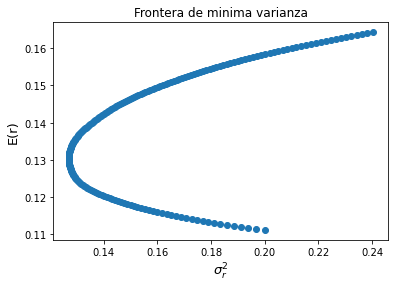

In [ ]:
plt.scatter(vol_opt, rend_opt)
plt.title("Frontera de minima varianza")
plt.xlabel(r"$\sigma^2_r$", fontsize=13)
plt.ylabel("E(r)", fontsize=13);
plt.show((25,10))

Ahora bien, busquemos el portafolio global de minima varianza

In [ ]:
constraints = [
    {"type": "eq", "fun": lambda w: w.sum()- 1},

]
bounds=[(0,None),(0,None),(0,None),(0,None),(0,None),(0,None),(0,None)]
port1 = minimize(lambda w: np.sqrt(w.dot(matriz_cov*252).dot(w)) ,np.random.random(7), constraints=constraints,bounds = bounds)
w_opt = port1.x
rend_glob_opt = w_opt.dot(r_capm)
vol_glob_opt = np.sqrt(w_opt.dot(matriz_cov*252).dot(w_opt)) 


Por lo que la frontera eficiente esta determinado por los siguientes portafolios

In [ ]:
rend_eficiente = np.array(rend_opt)[rend_opt> rend_glob_opt]
vol_eficiente = np.array(vol_opt)[rend_opt> rend_glob_opt]
pesos_optimos = np.array(pesos_optimos)[rend_opt> rend_glob_opt]

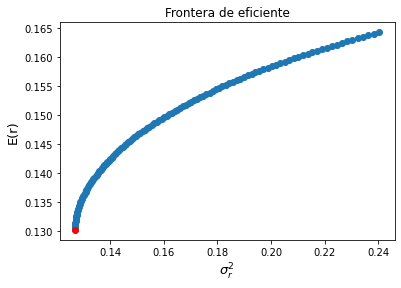

In [ ]:
plt.scatter(vol_eficiente, rend_eficiente)
plt.scatter(vol_glob_opt, rend_glob_opt,color='r')
plt.title("Frontera de eficiente")
plt.xlabel(r"$\sigma_r$", fontsize=13)
plt.ylabel("E(r)", fontsize=13);




### Encuentra el portafolio riesgoso óptimo (maximiza el coeficiente de Sharpe)

De nuestra frontera eficiente, veamos cual es el que portafolio que tiene el máximo coeficiente de sharpe

El portafolio con el coefiente de sharpe más alto es: 

In [ ]:
indice =  ((rend_eficiente - rf)/vol_eficiente).argmax()
pesos_optimos[indice,:]

array([0.0857202 , 0.22366408, 0.09748128, 0.09820673, 0.09730246,
       0.17556271, 0.22206254])

con un coeficiente de

In [ ]:
coef =((rend_eficiente - rf)/vol_eficiente).max()
coef

0.6650821373901596

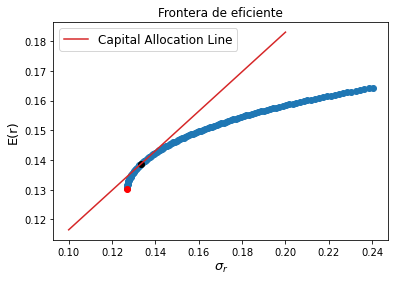

In [ ]:
sigma_c =  np.linspace(0.1, 0.2)
sharpe = rf + sigma_c * coef

plt.scatter(vol_eficiente, rend_eficiente)
plt.scatter(vol_glob_opt, rend_glob_opt,color='r')
plt.scatter(vol_eficiente[indice],rend_eficiente[indice] ,color='black')

plt.plot(sigma_c, sharpe, linestyle="-", c="tab:red", label="Capital Allocation Line")
plt.legend(fontsize=12)
plt.title("Frontera de eficiente")
plt.xlabel(r"$\sigma_r$", fontsize=13)
plt.ylabel("E(r)", fontsize=13);

## Calcula el VaR paramétrico del portafolio riesgoso óptimo (1 día, 95% de confianza) 

Si suponemos un capital invertido de $1,000,000 tenemos que el VaR de un día al 95% es de

In [ ]:
 from scipy.special import ndtri

In [ ]:
confianza = 0.95
quantil = ndtri(confianza)

In [ ]:
capital = 1000000

In [ ]:
VaR = vol_eficiente[indice]/np.sqrt(252) * quantil * capital
VaR

13820.19251150688